In [ ]:
# Libary setup

import requests 
from dotenv import load_dotenv
import json      
import pandas as pd  
import os
load_dotenv()

True

# *Quick Introduction *

This notebook is a supplementary resource for the workshop “Stock Portfolio Optimization with Python” using the Sectors API. It covers these topics: stock investment background and understanding the Sectors API, stock selection overview and two stock portfolio optimization models, followed by further recommendations and insights.

Using the Sectors API, investors gain access to valuable data from the “**Companies by Index**” and “**Daily Transaction Data**” endpoints, including stock indexes, dates, closing prices, volumes, and market capitalizations. Next, the “**Company Report**” API provides additional insights such as EPS, dividends, growth metrics, and other relevant financial information.

In **Section 3**, we will explore how to effectively query this data from the API to build a portfolio optimization model. However, before diving into optimization, it’s crucial to **understand the available stock indexes** and their **respective investment purposes**.

# Section 1 - Sectors API & Stock Investment Overview

When considering stock investments, individual investors typically focus on key questions such as: Which stocks to buy? How many shares? What’s the price, growth potential, and risk?

In [37]:
import pandas as pd

index_data = {

              #list of stock indexes from Sectors API

    'Index': ['FTSE', 'IDX30', 'IDXBUMN20', 'IDXESGL', 'IDXG30', 'IDXHIDIV20',
              'IDXQ30', 'IDXV30', 'JII70', 'KOMPAS100', 'LQ45', 'SMInfra18',
              'SRIKEHA18', 'SRIKEHATI'],

    'Focus': ['Globally recognized index of large-cap companies',
              'Top 30 stocks by market cap and liquidity',
              'Top 20 government-owned enterprises (BUMN)',
              'Stocks meeting ESG (environmental, social, governance) standards',
              'Large-cap, high liquidity growth stocks',
              '20 stocks with high dividend yields',
              'Focus on quality stocks based on financial metrics',
              'Focus on value stocks trading below intrinsic value',
              '70 stocks complying with Shariah (Islamic law)',
              '100 most liquid, actively traded stocks',
              'Top 45 most liquid stocks with large market caps',
              '18 infrastructure-related stocks',
              'Tracks sustainability and social responsibility',
              'Sustainability and ethical investing'],

    'Investment Use': ['For investors seeking to track global or broad market performance',
                       'Suitable for blue-chip stock investors looking for stable and liquid companies',
                       'For exposure to state-owned enterprises (SOEs) benefiting from government policies',
                       'Ideal for socially responsible investors focused on sustainability and ethical investing',
                       'For growth-oriented investors looking for long-term capital appreciation',
                       'Attractive to income-seeking investors focused on dividend income',
                       'Suitable for long-term investors seeking companies with strong fundamentals',
                       'Ideal for value investors looking for undervalued stocks',
                       'Suitable for Shariah-compliant investors following Islamic investment principles',
                       'For investors seeking diversified exposure to Indonesia’s liquid stocks',
                       'Blue-chip focused, for investors looking for stability and long-term growth potential',
                       'For investors bullish on infrastructure growth and development projects in Indonesia',
                       'Ideal for ESG investors prioritizing sustainable business practices',
                       'Same as SRIKEHA18, for socially responsible investors']
}

# Load into a pandas DataFrame
df_index_info = pd.DataFrame(index_data)

# Display the DataFrame
df_index_info

,Index,Focus,Investment Use
0,FTSE,Globally recognized index of large-cap companies,For investors seeking to track global or broad...
1,IDX30,Top 30 stocks by market cap and liquidity,Suitable for blue-chip stock investors looking...
2,IDXBUMN20,Top 20 government-owned enterprises (BUMN),For exposure to state-owned enterprises (SOEs)...
3,IDXESGL,"Stocks meeting ESG (environmental, social, gov...",Ideal for socially responsible investors focus...
4,IDXG30,"Large-cap, high liquidity growth stocks",For growth-oriented investors looking for long...
5,IDXHIDIV20,20 stocks with high dividend yields,Attractive to income-seeking investors focused...
6,IDXQ30,Focus on quality stocks based on financial met...,Suitable for long-term investors seeking compa...
7,IDXV30,Focus on value stocks trading below intrinsic ...,Ideal for value investors looking for underval...
8,JII70,70 stocks complying with Shariah (Islamic law),Suitable for Shariah-compliant investors follo...
9,KOMPAS100,"100 most liquid, actively traded stocks",For investors seeking diversified exposure to ...


Which index caught your attention? What do you want to choose?

# Section 2 - Where to start?

Recommendation: **Match your investment goals with the property of stock index**

In [38]:
import pandas as pd

# Dictionary representing the stock index information with persona examples
index_criteria = {
    'Criteria': [
        'Liquidity & Stability',
        'Government-Owned Enterprises',
        'Dividend Focus',
        'Growth-Oriented',
        'Value Stocks',
        'High-Quality Financials',
        'Shariah-Compliant Investments',
        'Socially Responsible Investments',
        'Infrastructure Focus',
        'Broad Market Exposure'
    ],
    'Description': [
        'Investors looking for highly liquid and stable stocks that are less volatile.',
        'For investors interested in companies benefiting from government backing and policies.',
        'Ideal for those seeking regular income from dividends.',
        'Suitable for long-term investors focusing on capital appreciation.',
        'Investors seeking undervalued stocks trading below intrinsic value.',
        'Focus on stocks with strong fundamentals and good financial health.',
        'For investors following Islamic principles.',
        'Investors interested in ESG (environmental, social, governance) and ethical business practices.',
        'For investors bullish on Indonesia\'s infrastructure growth.',
        'For investors wanting diversified exposure across large segments of the market.'
    ],
    'Persona': [
        'Maria, a risk-averse retiree seeking low volatility and stable returns.',
        'Adi, a public sector enthusiast who trusts government-driven initiatives.',
        'Siti, a conservative investor who prefers stable income from dividends.',
        'Kevin, a young professional aiming for long-term wealth through capital growth.',
        'Tom, a value investor who looks for bargain stocks below intrinsic value.',
        'Dewi, a financial analyst who invests in companies with strong fundamentals.',
        'Ahmad, a devout Muslim who prioritizes Shariah-compliant investments.',
        'Sarah, an environmentally conscious investor focusing on ethical companies.',
        'Indra, an infrastructure expert optimistic about Indonesia\'s construction growth.',
        'Emily, a diversified investor looking for broad market exposure and lower risk.'
    ],
    'Recommended Index': [
        'IDX30, LQ45, KOMPAS100',
        'IDXBUMN20',
        'IDXHIDIV20',
        'IDXG30',
        'IDXV30',
        'IDXQ30',
        'JII70',
        'IDXESGL, SRIKEHA18, SRIKEHATI',
        'SMINFA18',
        'FTSE, KOMPAS100'
    ]
}

df_index_criteria = pd.DataFrame(index_criteria)

df_index_criteria

,Criteria,Description,Persona,Recommended Index
0,Liquidity & Stability,Investors looking for highly liquid and stable...,"Maria, a risk-averse retiree seeking low volat...","IDX30, LQ45, KOMPAS100"
1,Government-Owned Enterprises,For investors interested in companies benefiti...,"Adi, a public sector enthusiast who trusts gov...",IDXBUMN20
2,Dividend Focus,Ideal for those seeking regular income from di...,"Siti, a conservative investor who prefers stab...",IDXHIDIV20
3,Growth-Oriented,Suitable for long-term investors focusing on c...,"Kevin, a young professional aiming for long-te...",IDXG30
4,Value Stocks,Investors seeking undervalued stocks trading b...,"Tom, a value investor who looks for bargain st...",IDXV30
5,High-Quality Financials,Focus on stocks with strong fundamentals and g...,"Dewi, a financial analyst who invests in compa...",IDXQ30
6,Shariah-Compliant Investments,For investors following Islamic principles.,"Ahmad, a devout Muslim who prioritizes Shariah...",JII70
7,Socially Responsible Investments,"Investors interested in ESG (environmental, so...","Sarah, an environmentally conscious investor f...","IDXESGL, SRIKEHA18, SRIKEHATI"
8,Infrastructure Focus,For investors bullish on Indonesia's infrastru...,"Indra, an infrastructure expert optimistic abo...",SMINFA18
9,Broad Market Exposure,For investors wanting diversified exposure acr...,"Emily, a diversified investor looking for broa...","FTSE, KOMPAS100"


While it’s crucial to evaluate a stock’s internal characteristics—such as its nature, properties, and the type of investor it appeals to—external macroeconomic factors play an equally important role in guiding stock index selection. **These broader economic conditions, including inflation rates, government policies, and global market trends, are key determinants in the performance of various sectors**. Therefore, understanding both your investment persona and the prevailing macroeconomic landscape is essential for making informed decisions.

Now let’s assume my client is Indra, an infrastructure expert optimistic about Indonesia’s construction growth. To confirm focusing solely on SMINFA18, we need to observe the following macroeconomic factors:

- Government infrastructure spending: Announcements of new airports and highways as public projects.
- Interest Rate policies: Indonesia’s central bank lowers interest rates.
- Commodity prices: Steel and cement prices drop due to global supply chain restructuring.
- Foreign Direct investment: China increases investment in Indonesia’s high-speed rail projects.
We will build the following content for our client Mr. X.

How to choose specific stocks from an index will be discussed in section 4.

# Section 3 - Data Collection from Sectors API

## Section 3.1 - Stock Price Information

In [41]:

# Retrive Stock index from "Companies by Index" API

import time
import requests
from dotenv import load_dotenv
import os
load_dotenv()

# Retrieve the API key securely
api_key = os.getenv('SECTORS_API_KEY')

# Define the API URL
url = "https://api.sectors.app/v1/index/sminfra18/"

# Pass the API key in the header
headers = {"Authorization": api_key}

# Make the API request
response_company_index = requests.get(url, headers=headers)

print(response_company_index.text)

[{"symbol":"ADHI.JK","company_name":"PT Adhi Karya (Persero) Tbk."},{"symbol":"AKRA.JK","company_name":"PT AKR Corporindo Tbk."},{"symbol":"BBNI.JK","company_name":"PT Bank Negara Indonesia (Persero) Tbk"},{"symbol":"BBRI.JK","company_name":"PT Bank Rakyat Indonesia (Persero) Tbk"},{"symbol":"BMRI.JK","company_name":"PT Bank Mandiri (Persero) Tbk"},{"symbol":"EXCL.JK","company_name":"PT XL Axiata Tbk"},{"symbol":"INTP.JK","company_name":"Indocement Tunggal Prakarsa Tbk"},{"symbol":"ISAT.JK","company_name":"PT Indosat Tbk"},{"symbol":"JSMR.JK","company_name":"PT Jasa Marga Tbk"},{"symbol":"MEDC.JK","company_name":"PT Medco Energi Internasional Tbk"},{"symbol":"PGAS.JK","company_name":"PT Perusahaan Gas Negara Tbk."},{"symbol":"PTPP.JK","company_name":"PP (Persero) Tbk"},{"symbol":"SMGR.JK","company_name":"Semen Indonesia (Persero) Tbk"},{"symbol":"SSIA.JK","company_name":"PT Surya Semesta Internusa Tbk"},{"symbol":"TBIG.JK","company_name":"PT Tower Bersama Infrastructure Tbk"},{"symbol"

In [43]:
# Retrieve date and price from "Daily Transaction Data" API

from datetime import datetime, timedelta

# Function to calculate the date 90 days ago from today
def calculate_start_date(days_ago=90):
    return (datetime.now() - timedelta(days=days_ago)).strftime('%Y-%m-%d')

# Calculate the start date 90 days ago
start_date = calculate_start_date()

# Looping API info
history_sminfra18 = []

for i, x in enumerate(response_company_index.json()):

  # Define the URL for the API endpoint
  url = "https://api.sectors.app/v1/daily/" + response_company_index.json()[i]['symbol'] + "/"

  # Define the query string with the calculated start date
  querystring = {"start": start_date}

  headers = {"Authorization": os.getenv('SECTORS_API_KEY')}

  response_daily_transaction_data = requests.request("GET", url, headers=headers, params=querystring)

  # Append the result into target list
  history_sminfra18.append(response_daily_transaction_data.json())

  time.sleep(1)

In [44]:
history_sminfra18

[[{'symbol': 'ADHI.JK',
   'date': '2024-08-26',
   'close': 308,
   'volume': 86013000,
   'market_cap': 2589543890944},
  {'symbol': 'ADHI.JK',
   'date': '2024-08-27',
   'close': 300,
   'volume': 38410400,
   'market_cap': 2522282983424},
  {'symbol': 'ADHI.JK',
   'date': '2024-08-28',
   'close': 296,
   'volume': 28861700,
   'market_cap': 2488652529664},
  {'symbol': 'ADHI.JK',
   'date': '2024-08-29',
   'close': 302,
   'volume': 42419200,
   'market_cap': 2539098210304},
  {'symbol': 'ADHI.JK',
   'date': '2024-08-30',
   'close': 304,
   'volume': 64637200,
   'market_cap': 2555913437184},
  {'symbol': 'ADHI.JK',
   'date': '2024-09-02',
   'close': 318,
   'volume': 417282100,
   'market_cap': 2673620025344},
  {'symbol': 'ADHI.JK',
   'date': '2024-09-03',
   'close': 310,
   'volume': 291300,
   'market_cap': 2606359117824},
  {'symbol': 'ADHI.JK',
   'date': '2024-09-04',
   'close': 308,
   'volume': 746300,
   'market_cap': 2589543890944},
  {'symbol': 'ADHI.JK',
   

## Section 3.2 - Company Report Information

In [46]:
company_report_sminfra18 = []

for i, x in enumerate(response_company_index.json()):

  #Define the URL for the API endpoint
  url = "https://api.sectors.app/v1/company/report/" +  response_company_index.json()[i]['symbol'] + "/"

  headers = {"Authorization": os.getenv('SECTORS_API_KEY')}

  #Make the API request
  response_company_report = requests.request("GET", url, headers=headers)

  # Append the result into target list
  company_report_sminfra18.append(response_company_report.json())

  time.sleep(1)

In [70]:
# Create a subset to retrieve relative information for analysis
prepared_data = []

# Looping through companies in the index
for company in company_report_sminfra18:
  current_company = {}

# Accessing relative API information
  current_company['symbol'] = company['symbol']
  current_company['company_name'] = company['company_name']
  current_company['industry'] = company['overview']['industry']
  current_company['sub_industry'] = company['overview']['sub_industry']
  current_company['sector'] = company['overview']['sector']

# For the forecast variables ("company_growth_forecasts" and "company_value_forecasts"), we can see that they have both year 2024 and 2025 forecast

# Create a function to only capture year 2025 value
  if company['future']['company_value_forecasts'] != None:
    for i, forecast in enumerate(company['future']['company_value_forecasts']):
      if forecast['estimate_year'] == 2025:
        position = i

# This code below, we can see that estimate_year has both 2024 and 2025, we only want forecast variables based on year 2025
# We also observe that the year is the same for 'company_value_forecast' and 'company_growth_forecasts'
# Meaning we just create 1 function to use one variable is enough to capture all the year to 2025 for forecasting variables
    #print(company['future']['company_value_forecasts'][0]['estimate_year'])
    #print(company['future']['company_growth_forecasts'][0]['estimate_year'])
    #print('next')


# Exception handling in case the value is empty to double secure the result

  try:
    current_company['eps_estimate'] = company['future']['company_value_forecasts'][position]['eps_estimate']
  except:
    current_company['eps_estimate'] = 0

  try:
    current_company['revenue_estimate'] = company['future']['company_value_forecasts'][position]['revenue_estimate']
  except:
    current_company['revenue_estimate'] = 0

  try:
    current_company['eps_growth'] = company['future']['company_growth_forecasts'][position]['eps_growth']
  except:
    current_company['eps_growth'] = 0

  try:
    current_company['revenue_growth'] = company['future']['company_growth_forecasts'][position]['revenue_growth']
  except:
    current_company['revenue_growth'] = 0

  try:
    current_company['total_dividends'] = company['dividend']['annual_yield'][0]['total']
  except:
    current_company['total_dividends'] = 0

  try:
    current_company['avg_yield_dividends'] = company['dividend']['dividend_yield_avg']['avg_yield']
  except:
    current_company['avg_yield_dividends'] = 0

  prepared_data.append(current_company)

prepared_data

[{'symbol': 'ADHI.JK',
  'company_name': 'PT Adhi Karya (Persero) Tbk.',
  'industry': 'Heavy Constructions & Civil Engineering',
  'sub_industry': 'Heavy Constructions & Civil Engineering',
  'sector': 'Infrastructures',
  'eps_estimate': 37.4,
  'revenue_estimate': 25220000000000,
  'eps_growth': 0.469257828622127,
  'revenue_growth': 0.256414499931735,
  'total_dividends': 17.0694,
  'avg_yield_dividends': 0.00909244380891323},
 {'symbol': 'AKRA.JK',
  'company_name': 'PT AKR Corporindo Tbk.',
  'industry': 'Oil & Gas',
  'sub_industry': 'Oil & Gas Storage & Distribution',
  'sector': 'Energy',
  'eps_estimate': 151.7,
  'revenue_estimate': 42630000000000,
  'eps_growth': 0.076889274618589,
  'revenue_growth': 0.012902990893099,
  'total_dividends': 100,
  'avg_yield_dividends': 0.0483752990141511},
 {'symbol': 'BBNI.JK',
  'company_name': 'PT Bank Negara Indonesia (Persero) Tbk',
  'industry': 'Banks',
  'sub_industry': 'Banks',
  'sector': 'Financials',
  'eps_estimate': 675.27,
 

# Section 4 - Which Stock to choose?

## Section 4.1 - Data Preprocessing

**How to select stocks?**

For our client Mr. X, who’s focused on stocks from the SMInfra18 index and doesn't want to invest in the ente it’s time to carefully select the right stocks.

Several key economic factors should guide stock selection from an index:

- Diversification by Industry and Sector: Ensuring exposure across different sectors to reduce risk.
- Diversification by Correlation and Returns: Selecting stocks that offer varied returns and are not too closely correlated.
- Company Growth and Dividend Information: Choosing companies with strong growth potential and reliable dividend payouts.

Other factors, like recent projects, mergers, acquisitions, and broader macroeconomic or geopolitical policies, are also worth considering, though we won’t delve into them here.

In this section, we will employ a range of data analysis techniques, along with our expertise in stock selection, to identify two suitable stocks from a pool of 18 for our client, Indra, to invest in.

Step 1: Create a Dataframe for historical stock performance

In [71]:
# Import all useful libraries
import numpy as np
import pandas as pd

In [72]:
# Flatten the list of lists into a single list of dictionaries
flattened_data = [item for sublist in history_sminfra18 for item in sublist]

# Convert to a pandas DataFrame
df_history_sminfra18 = pd.DataFrame(flattened_data)

# Ensure 'date' is in datetime format
df_history_sminfra18['date'] = pd.to_datetime(df_history_sminfra18['date'])

# Enforce in case any column needs conversion (e.g., 'close', 'volume', 'market_cap')
df_history_sminfra18['close'] = pd.to_numeric(df_history_sminfra18['close'], errors='coerce')
df_history_sminfra18['volume'] = pd.to_numeric(df_history_sminfra18['volume'], errors='coerce')
df_history_sminfra18['market_cap'] = pd.to_numeric(df_history_sminfra18['market_cap'], errors='coerce')

# Check for the first few rows to ensure everything is correct
print(df_history_sminfra18)

      symbol       date  close    volume      market_cap
0    ADHI.JK 2024-08-26    308  86013000   2589543890944
1    ADHI.JK 2024-08-27    300  38410400   2522282983424
2    ADHI.JK 2024-08-28    296  28861700   2488652529664
3    ADHI.JK 2024-08-29    302  42419200   2539098210304
4    ADHI.JK 2024-08-30    304  64637200   2555913437184
..       ...        ...    ...       ...             ...
355  UNTR.JK 2024-09-17  26675   3545000  96878532231168
356  UNTR.JK 2024-09-18  26725   2423100  96969330524160
357  UNTR.JK 2024-09-19  26625   2357100  96696944033792
358  UNTR.JK 2024-09-20  26925   3949100  97786481606656
359  UNTR.JK 2024-09-23  27125   3043800  98785229275136

[360 rows x 5 columns]


In [73]:
# We aim to have all the stock price evolution in the past 90 days in one dataframe

#Pivot the DataFrame so that the 'symbol' becomes the column names and 'date' becomes the index
df_pivot_history_sminfra18 = df_history_sminfra18.pivot_table(index='date', columns='symbol', values='close')
df_pivot_history_sminfra18.head()

symbol,ADHI.JK,AKRA.JK,BBNI.JK,BBRI.JK,BMRI.JK,EXCL.JK,INTP.JK,ISAT.JK,JSMR.JK,MEDC.JK,PGAS.JK,PTPP.JK,SMGR.JK,SSIA.JK,TBIG.JK,TLKM.JK,TOWR.JK,UNTR.JK
date,,,,,,,,,,,,,,,,,,
2024-08-26,308,1470,5525,5300,7050,2230,7050,2690,5425,1300,1680,456,4010,1035,1915,2980,815,26950
2024-08-27,300,1485,5400,5175,7025,2240,7050,2680,5425,1300,1580,442,3970,1065,1940,2990,825,27250
2024-08-28,296,1505,5375,5150,7225,2240,7075,2660,5425,1285,1575,434,4020,1045,1960,2980,830,27700
2024-08-29,302,1480,5300,5125,7100,2230,7050,2590,5300,1265,1550,446,4020,1105,1925,3030,830,27325
2024-08-30,304,1495,5350,5150,7125,2230,6900,2590,5350,1255,1540,454,4010,1200,1925,3060,835,27050


In [74]:
#Save the DataFrame to a CSV file -- we need to use this for MVO analysis
#df_pivot_history_sminfra18.to_csv('stock_prices_sminfra18.csv', index=False)

Step 2: Create a Dataframe for company report

In [75]:
df_sminfra18_company_report = pd.DataFrame(prepared_data)
df_sminfra18_company_report

,symbol,company_name,industry,sub_industry,sector,eps_estimate,revenue_estimate,eps_growth,revenue_growth,total_dividends,avg_yield_dividends
0,ADHI.JK,PT Adhi Karya (Persero) Tbk.,Heavy Constructions & Civil Engineering,Heavy Constructions & Civil Engineering,Infrastructures,37.40,25220000000000,0.469258,0.256414,17.0694,0.009092
1,AKRA.JK,PT AKR Corporindo Tbk.,Oil & Gas,Oil & Gas Storage & Distribution,Energy,151.70,42630000000000,0.076889,0.012903,100.0000,0.048375
2,BBNI.JK,PT Bank Negara Indonesia (Persero) Tbk,Banks,Banks,Financials,675.27,70890000000000,0.203206,0.151119,280.4950,0.051717
3,BBRI.JK,PT Bank Rakyat Indonesia (Persero) Tbk,Banks,Banks,Financials,443.55,214380000000000,0.113784,0.287753,319.0000,0.037705
4,BMRI.JK,PT Bank Mandiri (Persero) Tbk,Banks,Banks,Financials,673.50,163850000000000,0.141662,0.329568,353.9580,0.043529
5,EXCL.JK,PT XL Axiata Tbk,Wireless Telecommunication Services,Wireless Telecommunication Services,Infrastructures,171.36,37260000000000,0.762242,0.152752,48.6000,0.011895
6,INTP.JK,Indocement Tunggal Prakarsa Tbk,Construction Materials,Construction Materials,Basic Materials,495.65,19690000000000,-0.128010,0.096951,90.0000,0.037967
7,ISAT.JK,PT Indosat Tbk,Wireless Telecommunication Services,Wireless Telecommunication Services,Infrastructures,840.26,59740000000000,5.013457,0.166141,268.4000,0.040127
8,JSMR.JK,PT Jasa Marga Tbk,Transport Infrastructure Operator,Highways & Railtracks,Infrastructures,506.18,20350000000000,-0.459224,-0.045435,37.8635,0.006365
9,MEDC.JK,PT Medco Energi Internasional Tbk,Oil & Gas,Oil & Gas Production & Refinery,Energy,0.00,0,0.000000,0.000000,45.0720,0.016426


## Section 4.2 - Exploratory Data Analysis (EDA)

Our goal is to select two or three stocks from a list of 18 for Mr. X to invest in.

At the beginning of this section, we outlined three strategies:

Diversification by Industry and Sector: Conduct an overview analysis to understand the information better.
Diversification by Correlation: Examine the correlation matrix based on stock price evolution.
Company Growth and Dividend Information: Extract all relevant information beyond sector and industry, normalize the data, and assign a score to each stock.

Overview of Sectors and Industries

In [76]:
# Categorize stocks by industries
df_sminfra18_company_report.industry.value_counts()

Wireless Telecommunication Services        4
Heavy Constructions & Civil Engineering    3
Oil & Gas                                  3
Banks                                      3
Construction Materials                     2
Transport Infrastructure Operator          1
Telecommunication Service                  1
Machinery                                  1
Name: industry, dtype: int64

In [77]:
# Categorize stocks by sectors
df_sminfra18_company_report.sector.value_counts()

Infrastructures    9
Energy             3
Financials         3
Basic Materials    2
Industrials        1
Name: sector, dtype: int64

Correlation Matrix on stock price evolution

In [78]:
# Calculate the correlation of the 18 stock prices
correlation_matrix = df_pivot_history_sminfra18.corr()
correlation_matrix

symbol,ADHI.JK,AKRA.JK,BBNI.JK,BBRI.JK,BMRI.JK,EXCL.JK,INTP.JK,ISAT.JK,JSMR.JK,MEDC.JK,PGAS.JK,PTPP.JK,SMGR.JK,SSIA.JK,TBIG.JK,TLKM.JK,TOWR.JK,UNTR.JK
symbol,,,,,,,,,,,,,,,,,,
ADHI.JK,1.000000,-0.308847,-0.609597,-0.589633,-0.722748,-0.186241,0.377395,-0.332941,0.671047,0.161785,0.496682,0.752388,0.821585,-0.381447,0.580793,-0.406046,-0.307926,0.704361
AKRA.JK,-0.308847,1.000000,-0.179781,0.354193,0.013345,-0.206273,0.537691,-0.441897,0.195076,0.674437,0.205273,-0.518406,-0.267198,-0.429186,-0.076207,0.347224,-0.165886,0.168899
BBNI.JK,-0.609597,-0.179781,1.000000,0.782595,0.783513,0.464564,-0.667004,0.600748,-0.769759,-0.377301,-0.593272,-0.183470,-0.720426,0.691323,-0.769719,0.436903,0.471784,-0.659788
BBRI.JK,-0.589633,0.354193,0.782595,1.000000,0.635279,0.359269,-0.285326,0.293223,-0.474666,0.074610,-0.295669,-0.333261,-0.804774,0.312081,-0.709462,0.634174,0.162694,-0.418935
BMRI.JK,-0.722748,0.013345,0.783513,0.635279,1.000000,0.471740,-0.670334,0.456059,-0.756231,-0.502121,-0.759674,-0.255359,-0.674414,0.689291,-0.530684,0.605429,0.417965,-0.547383
EXCL.JK,-0.186241,-0.206273,0.464564,0.359269,0.471740,1.000000,-0.560902,0.477503,-0.362698,-0.293390,-0.496241,0.184692,-0.222551,0.672758,-0.173933,0.338167,0.358593,-0.261704
INTP.JK,0.377395,0.537691,-0.667004,-0.285326,-0.670334,-0.560902,1.000000,-0.661118,0.704916,0.808006,0.762495,-0.110282,0.460997,-0.844975,0.400660,-0.327613,-0.439463,0.558832
ISAT.JK,-0.332941,-0.441897,0.600748,0.293223,0.456059,0.477503,-0.661118,1.000000,-0.441587,-0.423674,-0.331170,-0.117367,-0.385000,0.509039,-0.200295,-0.120409,0.456663,-0.483841
JSMR.JK,0.671047,0.195076,-0.769759,-0.474666,-0.756231,-0.362698,0.704916,-0.441587,1.000000,0.668073,0.815708,0.107467,0.585421,-0.848338,0.731726,-0.526654,-0.641004,0.712612


## Section 4.3 - Normalization & Scoring

In [79]:
# Import library for normalization
from sklearn.preprocessing import MinMaxScaler

# Extract useful information for normalization analysis
columns_of_interest = ['symbol', 'eps_growth', 'avg_yield_dividends', 'revenue_growth', 'revenue_estimate']
df_sminfra18_company_report_norm = df_sminfra18_company_report[columns_of_interest]
df_sminfra18_company_report_norm

,symbol,eps_growth,avg_yield_dividends,revenue_growth,revenue_estimate
0,ADHI.JK,0.469258,0.009092,0.256414,25220000000000
1,AKRA.JK,0.076889,0.048375,0.012903,42630000000000
2,BBNI.JK,0.203206,0.051717,0.151119,70890000000000
3,BBRI.JK,0.113784,0.037705,0.287753,214380000000000
4,BMRI.JK,0.141662,0.043529,0.329568,163850000000000
5,EXCL.JK,0.762242,0.011895,0.152752,37260000000000
6,INTP.JK,-0.128010,0.037967,0.096951,19690000000000
7,ISAT.JK,5.013457,0.040127,0.166141,59740000000000
8,JSMR.JK,-0.459224,0.006365,-0.045435,20350000000000
9,MEDC.JK,0.000000,0.016426,0.000000,0


In [80]:
# Check missing data
df_sminfra18_company_report_norm.isnull().sum()

symbol                 0
eps_growth             1
avg_yield_dividends    0
revenue_growth         0
revenue_estimate       0
dtype: int64

In [81]:
# Impute missing data with mean - we do a simple imputation here, can also check the reason and correlation with other variables behind missing data
df_sminfra18_company_report_norm.fillna(df_sminfra18_company_report_norm.eps_growth.mean(), inplace=True)
df_sminfra18_company_report_norm.isnull().sum()

C:\Users\idani\AppData\Local\Temp\ipykernel_20912\3000651858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sminfra18_company_report_norm.fillna(df_sminfra18_company_report_norm.eps_growth.mean(), inplace=True)


symbol                 0
eps_growth             0
avg_yield_dividends    0
revenue_growth         0
revenue_estimate       0
dtype: int64

In [82]:
# Normalize the data for the metrics using MinMaxScaler
scaler = MinMaxScaler()
df_sminfra18_company_report_norm[['eps_growth', 'avg_yield_dividends', 'revenue_growth', 'revenue_estimate']] = scaler.fit_transform(df_sminfra18_company_report_norm[['eps_growth', 'avg_yield_dividends', 'revenue_growth', 'revenue_estimate']])

C:\Users\idani\AppData\Local\Temp\ipykernel_20912\72547661.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sminfra18_company_report_norm[['eps_growth', 'avg_yield_dividends', 'revenue_growth', 'revenue_estimate']] = scaler.fit_transform(df_sminfra18_company_report_norm[['eps_growth', 'avg_yield_dividends', 'revenue_growth', 'revenue_estimate']])


In [83]:
# Add a ranking system by summing the normalized scores for all metrics
df_sminfra18_company_report_norm['score'] = df_sminfra18_company_report_norm.iloc[:, 1:5].sum(axis=1)
df_sminfra18_company_report_norm

C:\Users\idani\AppData\Local\Temp\ipykernel_20912\1359398913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sminfra18_company_report_norm['score'] = df_sminfra18_company_report_norm.iloc[:, 1:5].sum(axis=1)


,symbol,eps_growth,avg_yield_dividends,revenue_growth,revenue_estimate,score
0,ADHI.JK,0.169658,0.054676,0.804926,0.117642,1.146901
1,AKRA.JK,0.097962,0.496047,0.155566,0.198853,0.948428
2,BBNI.JK,0.121043,0.533591,0.524140,0.330675,1.509449
3,BBRI.JK,0.104703,0.376161,0.888495,1.000000,2.369360
4,BMRI.JK,0.109797,0.441596,1.000000,0.764297,2.315690
5,EXCL.JK,0.223193,0.086170,0.528494,0.173804,1.011661
6,INTP.JK,0.060521,0.379101,0.379692,0.091846,0.911161
7,ISAT.JK,1.000000,0.403374,0.564199,0.278664,2.246237
8,JSMR.JK,0.000000,0.024034,0.000000,0.094925,0.118959
9,MEDC.JK,0.083912,0.137071,0.121158,0.000000,0.342142


In [84]:
# Sort the companies by total score
df_sminfra18_company_report_norm = df_sminfra18_company_report_norm.sort_values(by='score', ascending=False).reset_index(drop=True)
df_sminfra18_company_report_norm

,symbol,eps_growth,avg_yield_dividends,revenue_growth,revenue_estimate,score
0,BBRI.JK,0.104703,0.376161,0.888495,1.000000,2.369360
1,BMRI.JK,0.109797,0.441596,1.000000,0.764297,2.315690
2,ISAT.JK,1.000000,0.403374,0.564199,0.278664,2.246237
3,BBNI.JK,0.121043,0.533591,0.524140,0.330675,1.509449
4,SSIA.JK,0.509772,0.000000,0.757222,0.026215,1.293209
5,UNTR.JK,0.083912,1.000000,0.121158,0.000000,1.205070
6,ADHI.JK,0.169658,0.054676,0.804926,0.117642,1.146901
7,EXCL.JK,0.223193,0.086170,0.528494,0.173804,1.011661
8,PTPP.JK,0.100034,0.081197,0.656794,0.111997,0.950022
9,AKRA.JK,0.097962,0.496047,0.155566,0.198853,0.948428


In [85]:
# Pick the top 5 companies
top_5_companies = df_sminfra18_company_report_norm.head(5)
top_5_companies

,symbol,eps_growth,avg_yield_dividends,revenue_growth,revenue_estimate,score
0,BBRI.JK,0.104703,0.376161,0.888495,1.000000,2.369360
1,BMRI.JK,0.109797,0.441596,1.000000,0.764297,2.315690
2,ISAT.JK,1.000000,0.403374,0.564199,0.278664,2.246237
3,BBNI.JK,0.121043,0.533591,0.524140,0.330675,1.509449
4,SSIA.JK,0.509772,0.000000,0.757222,0.026215,1.293209


## Section 4.4 - Stock selection choice

Based on the results from Section 4.3, we have identified the top five stock tickers that we should consider for selection, as they have received the highest scores.

Next, we will implement our diversification strategy, focusing on industry and sector, as well as correlation analysis, to select two stocks from this group of five high-scoring candidates.

In [86]:
# Store the top 5 company symbol into a list
top_5_symbols = top_5_companies['symbol'].tolist()
top_5_symbols

['BBRI.JK', 'BMRI.JK', 'ISAT.JK', 'BBNI.JK', 'SSIA.JK']

In [87]:
# Store the top 5 company symbol into a list
top_5_symbols = top_5_companies['symbol'].tolist()
top_5_symbols

['BBRI.JK', 'BMRI.JK', 'ISAT.JK', 'BBNI.JK', 'SSIA.JK']

We have three stocks are all in banking industry / financial sector. For those three tickers (BBNI.JK, BBRI.JK, BMRI.JK), we choose the ticker with the highest score - BBRI.JK.

Now we have our choice: BBRI.JK, TLKM.JK, UNTR.JK.

We need to confirm that their price movement doesn't have high positive correlation.

In [88]:
# Query the price history info for selected 3 tickers and check correlation
selected_3_symbols =  ['BBRI.JK', 'TLKM.JK', 'UNTR.JK']
selected_3_prices = df_pivot_history_sminfra18[selected_3_symbols]
correlation_matrix_selected = selected_3_prices.corr()
correlation_matrix_selected

symbol,BBRI.JK,TLKM.JK,UNTR.JK
symbol,,,
BBRI.JK,1.000000,0.634174,-0.418935
TLKM.JK,0.634174,1.000000,-0.122628
UNTR.JK,-0.418935,-0.122628,1.000000


TLKM.JK and BBRI.JK, their price has strong positive correlation! We drop one and only select BBRI.JK, since it has the highest score regarding growth potential analysis.

To sum up, our final choices are two stocks: BBRI.JK & UNTR.JK.

In [89]:
Indra_stocks = ['BBRI.JK', 'UNTR.JK']

In [90]:
# Query the price info for Indra_stocks
price_Indra = df_pivot_history_sminfra18[Indra_stocks]
price_Indra.head()

symbol,BBRI.JK,UNTR.JK
date,,
2024-08-26,5300,26950
2024-08-27,5175,27250
2024-08-28,5150,27700
2024-08-29,5125,27325
2024-08-30,5150,27050


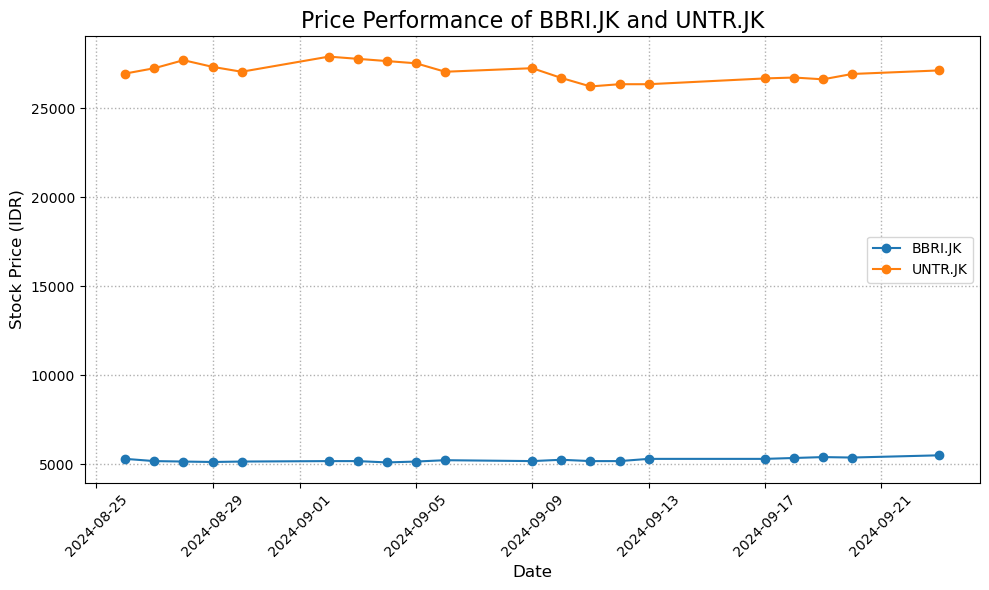

In [91]:
# Vizualize the movement of Indra's two stocks for the past 90 days
import matplotlib.pyplot as plt

# Plotting the prices for both BBRI.JK and UNTR.JK
plt.figure(figsize=(10, 6))

# Plot BBRI.JK stock prices
plt.plot(price_Indra.index, price_Indra['BBRI.JK'], label='BBRI.JK', marker='o')

# Plot UNTR.JK stock prices
plt.plot(price_Indra.index, price_Indra['UNTR.JK'], label='UNTR.JK', marker='o')

# Adding title and labels
plt.title('Price Performance of BBRI.JK and UNTR.JK', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (IDR)', fontsize=12)

# Displaying a legend to distinguish between the two stocks
plt.legend()

# Adding grid for better readability
plt.grid(True, linestyle=':', linewidth=1)

# Display the plot
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Ensure everything fits well in the plot
plt.show()

# Section 5 - MVO with Monte Carlos Simulation

## Section 5.1 - Theoretical Context

After understanding which stock to invest in, here are some key questions:

- How much of each stock should we hold?
- How to balance between risk and reward?

This is where Mean-Variance Optimization (MVO) comes in. It’s a method to help us find the optimal way to allocate our capital among various stocks - find the optimal weight.

What are the information we need?

1. Expected Returns: This is the average return you expect from each stock based on historical performance.

2. Risk (Volatility): Risk is measured as the variance (or more commonly, standard deviation) of the returns. It shows how much the stock’s returns fluctuate.

3. Covariance Between Stocks: Covariance tells us how the returns of two stocks move together. Some stocks may go up and down at the same time (positive covariance), while others may move in opposite directions (negative covariance). Covariance helps us understand how diversification can reduce risk.

Step 2: Build the Model

Once we have this data, the next step is to use it to construct a portfolio of stocks. The goal of the model is twofold:

- Maximize Return: We want to achieve the highest possible return for a given amount of risk.
- Minimize Risk: Alternatively, we might want to minimize risk while achieving a certain return level.

Consult the mathematical model here: [link text](https://en.wikipedia.org/wiki/Modern_portfolio_theory)

Step 3: Optimize the Portfolio through Sharp Ratio

Now that the model is built, we can use it to optimize the portfolio. This means:

- Maximizing Return for a Given Level of Risk: This is suitable for investors who are willing to take on some risk but want to get the highest return for that risk level.
- Minimizing Risk for a Given Return: This is helpful for more conservative investors who want to reduce risk as much as possible while still achieving a certain return.

This optimization results will generate an Efficient Frontier:

A curve that shows the best possible portfolios in terms of risk and return. Every point on the frontier represents a portfolio that either minimizes risk for a given return or maximizes return for a given risk.

The highest sharp ratio point, which lies on the efficient frontier, gives the optimal portfolio weight.

Bibliography:

Useful math for Portfolio Optimization. [link](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.fields.utoronto.ca/programs/scientific/09-10/finance/courses/pliska3.pdf)

Understand basic concepts of mean (return), variance (risk) and how they work in investing. [link](https://smartasset.com/financial-advisor/mean-variance-optimization)

Understand Mean Variance Optimization Model. [link](https://analystprep.com/study-notes/cfa-level-iii/mean-variance-optimization-an-overview/#:~:text=Mean%2Dvariance%20optimization%20(%E2%80%9CMVO,risk%2Dto%2Dreturn%20profile.))

## Section 5.2 - Mean & Variance

For this section, for a better illustration of the model, we will randomly generate 4 stocks from the sminfra18 to compose a portfolio to optimize.

In [93]:
# Import all useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
# Randomly select 4 stocks from sminfra18
sminfra18_tickers = df_pivot_history_sminfra18.columns.tolist()

selected_stocks = np.random.choice(sminfra18_tickers, size=4, replace=False)
selected_stocks

array(['SMGR.JK', 'PGAS.JK', 'BBRI.JK', 'BMRI.JK'], dtype='<U7')

In [95]:
# Query the price info for the selected stocks
prices = df_pivot_history_sminfra18[selected_stocks]
prices.head()

symbol,SMGR.JK,PGAS.JK,BBRI.JK,BMRI.JK
date,,,,
2024-08-26,4010,1680,5300,7050
2024-08-27,3970,1580,5175,7025
2024-08-28,4020,1575,5150,7225
2024-08-29,4020,1550,5125,7100
2024-08-30,4010,1540,5150,7125


In [96]:
# Calculate Returns
returns = pd.DataFrame()

for stock in prices:
  returns[stock + ' Returns'] = prices[stock].pct_change().dropna()

returns.head()

,SMGR.JK Returns,PGAS.JK Returns,BBRI.JK Returns,BMRI.JK Returns
date,,,,
2024-08-27,-0.009975,-0.059524,-0.023585,-0.003546
2024-08-28,0.012594,-0.003165,-0.004831,0.028470
2024-08-29,0.000000,-0.015873,-0.004854,-0.017301
2024-08-30,-0.002488,-0.006452,0.004878,0.003521
2024-09-02,0.019950,0.003247,0.004854,0.010526


In [97]:
# Calculate expected returns (mean) and covariance matrix
# Assuming 252 is the trading days in a year = 365 - weekends 104 - holidays 9
# We need to annualize the return and risk since MVO models are long-term orientated and long-term in economics perspectives refers to 12 months +

expected_returns = (1 + returns.mean()) ** 252 - 1 # Annualize by multiplying by trading days
covariance_matrix = (1 + returns.cov()) ** 252 - 1 # Annualize covariance

# Print the expected returns and covariance matrix
print("Expected Returns:")
print(expected_returns)
print("\nCovariance Matrix:")
print(covariance_matrix)

Expected Returns:
SMGR.JK Returns   -0.449560
PGAS.JK Returns   -0.790014
BBRI.JK Returns    0.666248
BMRI.JK Returns    1.122537
dtype: float64

Covariance Matrix:
                 SMGR.JK Returns  PGAS.JK Returns  BBRI.JK Returns  \
SMGR.JK Returns         0.025804         0.008102         0.000621   
PGAS.JK Returns         0.008102         0.065435         0.019248   
BBRI.JK Returns         0.000621         0.019248         0.041700   
BMRI.JK Returns         0.004108         0.003032         0.001543   

                 BMRI.JK Returns  
SMGR.JK Returns         0.004108  
PGAS.JK Returns         0.003032  
BBRI.JK Returns         0.001543  
BMRI.JK Returns         0.044934  


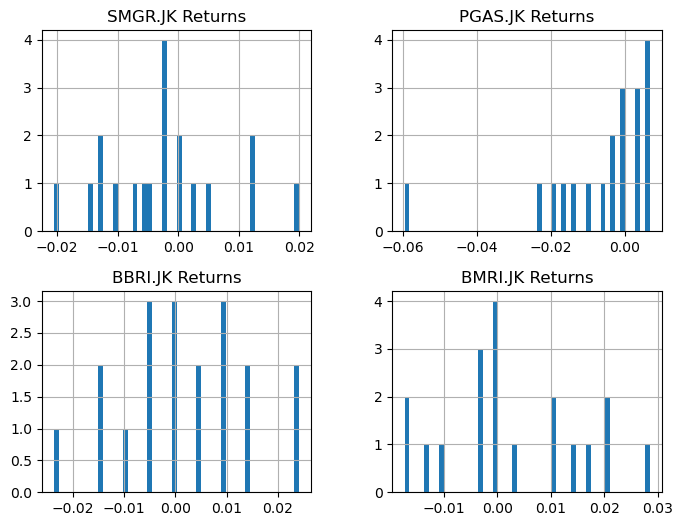

In [98]:
# Here we can see the distribution of each stock returns
returns.hist(figsize=(8,6), bins = 50)
plt.show()

## Section 5.3 Monte Carlo Simulation

Monte Carlo simulation is a powerful technique used in portfolio optimization to assess the potential outcomes of different investment strategies or different allocations under varying conditions. It involves generating multiple scenarios based on statistical models and random sampling.

Implementing Monte Carlo simulation in Python involves combining statistical analysis, simulation, and optimization techniques to gain insights into portfolio performance under different allocations. For our analysis, we will run a simulation on different allocations of the same stocks to find the optimum allocation. A single run of the simulation is shown in the code below.

In [99]:
# Define Risk Free rate
# Assume RF as 6.64% as the yield of 10 year Indonesian Government bond
# Source link https://tradingeconomics.com/indonesia/government-bond-yield
rf = 0.0664

# Monte Carlo simulation
#Single Run
np.random.seed(101)
print(selected_stocks)

# Generates an array of random numbers representing initial weights for each asset in the portfolio
weights = np.array(np.random.random(4))
print('\nRandom Weights')
print(weights)

# Normalizing the randomly generated weights to ensure they sum up to 1, representing a fully invested portfolio.
print('\nRebalanced Weights')
weights = weights / np.sum(weights)
print(weights)

# Calculating the portfolio’s expected return using the weighted average of individual asset returns.
# It multiplies the annual mean returns of each asset by its respective weight and aggregates them.
print('\nPortfolio Return')
portfolio_return = np.sum(returns.mean()*252*weights)
print(portfolio_return)

# Expected Volatility (Standard Deviation): Using the formula for portfolio volatility, it calculates the square root of the dot product of weights, the covariance matrix of asset returns (multiplied by 252 for annualization), and weights transpose.
# The square root of covariance matrix is taken because square root of variance is standard deviation or volatility.
print('\nPortfolio Volatility')
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights)))
print(portfolio_volatility)

# Sharpe Ratio measures the risk-adjusted return by subtracting the risk-free rate from the portfolio return and dividing by its volatility.
print('\nPortfolio Sharpe Ratio')
sharpe_ratio = (portfolio_return - rf) / portfolio_volatility
print(sharpe_ratio)

['SMGR.JK' 'PGAS.JK' 'BBRI.JK' 'BMRI.JK']

Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166]

Rebalanced Weights
[0.40122278 0.44338777 0.02212343 0.13326603]

Portfolio Return
-0.8173692652030836

Portfolio Volatility
0.1463749869925122

Portfolio Sharpe Ratio
-6.037706874387581


Having seen a single run of the simulation above, let us now perform 5000 simulations of the random allocations generated to find the optimum allocation for the four stocks chosen. The portfolio performance will analyzed based on the Sharpe ratio. The Sharpe ratio gives the return delivered per unit of risk taken. The code for the simulation is shown below.

In [100]:
# Specify the number of simulated portfolios to generate (in our case, 5000)
num_ports = 5000

# A 2D array to store the randomly generated weights for each asset in each portfolio.
all_weights = np.zeros((num_ports, len(selected_stocks)))

# Create arrays to store portfolio returns, volatilities, and Sharpe ratios for each simulated portfolio.
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharp_arr = np.zeros(num_ports)

# Looping over each portfolio
for i in range(num_ports):

  # Generate random weights randomly assigning weights to each asset in the portfolio and rebalancing them to sum up to 1
  weights = np.array(np.random.random(4))
  weights = weights / np.sum(weights)
  all_weights[i, :] = weights

  #Expected return
  ret_arr[i] = np.sum((returns.mean() * 252 * weights))

  #Expected volatility
  vol_arr[i] = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

  #Sharpe ratio
  sharp_arr[i] = (ret_arr[i] - rf) / vol_arr[i]

## Section 5.4 - Sharpe Ratio

Sharpe ratio measures the risk-adjusted return by subtracting the risk-free rate. We want the portfolio weight randomly generated by Monte Carlo Simulation with the highest sharp ratio.

More info [link text](https://www.investopedia.com/terms/s/sharperatio.asp)

In [101]:
# Retrieve the maximum value from the sharp_arr array
max_sr = sharp_arr.max()

# Find the index of the portfolio with the maximum Sharpe ratio in the sharp_arr array.
max_sr_index = sharp_arr.argmax()

# Retrieve the weights of the assets in the portfolio corresponding to the index 4091 in the all_weights array.
opt_weights = all_weights[max_sr_index,:]

# Retrive the optimal expected returns and volaticity
optimal_return = ret_arr[max_sr_index]
optimal_volatility = vol_arr[max_sr_index]

# Print Result
print('Max Sharpe Ratio: ', max_sr)
print('Optimal Return: ', optimal_return)
print('Optimal Volatility: ', optimal_volatility)
print('Optimal Weights: ', opt_weights)
print('Stock List: ', selected_stocks)

Max Sharpe Ratio:  3.6720165850462783
Optimal Return:  0.6058141946659916
Optimal Volatility:  0.14689862700039885
Optimal Weights:  [0.03094896 0.00430075 0.39649081 0.56825948]
Stock List:  ['SMGR.JK' 'PGAS.JK' 'BBRI.JK' 'BMRI.JK']


## Section 5.5 - Efficient Frontier

The efficient frontier rates portfolios on a coordinate plane. Plotted on the x-axis is the risk, while return is plotted on the y-axis—annualized standard deviation is typically used to measure risk, while compound annual growth rate (CAGR) is used for return.

More info [link](https://www.investopedia.com/terms/e/efficientfrontier.asp)

The volatility, return and sharpe ratio values for the simulation are plotted below.

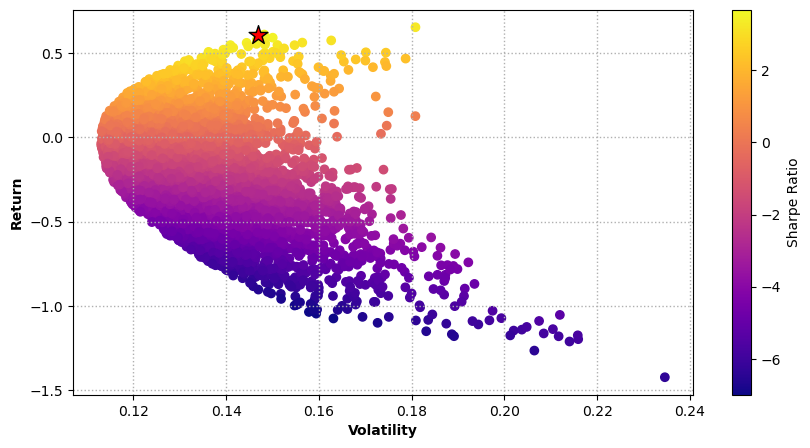

In [102]:
plt.figure(figsize = (10,5))
plt.scatter(vol_arr, ret_arr, c = sharp_arr, cmap = 'plasma')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatility', fontweight = 'bold')
plt.ylabel('Return', fontweight = 'bold')

plt.scatter(optimal_volatility, optimal_return, c='red', s=200, edgecolors='black', marker='*')
plt.grid(True, ls=':', lw=1)

The visualization can be seen above for volatility, return and sharpe ratio. The x-axis shows the volatility, y axis shows the return and the colorbar on right shows the sharpe ratio graded colorwise with dark color showing the lowest and light values showing the highest sharpe ratio. The red star shows the highest Sharpe ratio point on the plot.

# Section 6 - MVO with Scipy Minimized Function

## Section 6.1 - Overview

In our next analysis method, we will optimize the same portfolio allocation mathematically using the minimize function in Scipy (a library in Python) and Sharpe ratio.

Portfolio optimization using Scipy’s minimize function and the Sharpe ratio involves using mathematical optimization to find the optimal asset allocation that maximizes the Sharpe ratio—a measure of risk-adjusted returns.

The basic principle is to find the Sharpe ratio for a random allocation and then multiply it by -1 to make it negative and then minimize it to obtain the allocation weights that gives the highest Sharpe ratio.

In [103]:
def ret_vol_sr(weights):
  weights = np.array(weights)

  # Calculate Annualized Expected Returns
  ret = np.sum(returns.mean() * weights * 252)

  # Calculate Portfolio Volaticity
  vol = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

  # Calculate Sharp Ratio, Rist Free rate 6.4%
  sr = (ret - rf) / vol

  return np.array([ret, vol, sr])

## Section 6.2 Scipy Minimize Function

In [104]:
from scipy.optimize import minimize

# This function below is designed to negate the Sharpe ratio because in optimization, the objective function is minimized by default.
# We want to maximize the Sharpe ratio, index 2, so multiplying by -1 helps flip the optimization to achieve that.
def sharp_neg(weights):
  return ret_vol_sr(weights)[2] * -1

# constraint function ensures the weight sum is 1
# In optimization, constraints are typically written such that the result equals 0
# If the sum of weights is exactly 1, then np.sum(weights) - 1 will equal 0. This satisfies the constraint that the sum of the weights must be 1.
def sum_check(weights):
  return np.sum(weights) - 1

# We want equity constraint, the function must return a value equals to 0
# Specify the equality constraint that the sum of weights must equal 1.
cons = ({'type': 'eq', 'fun': sum_check})

# Ensure that each weight lies between 0 and 1, meaning no short-selling or leverage.
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))

# Initial guess for the optimization (equal weighting of 25% for each stock initially.
init_guess = [0.25, 0.25, 0.25, 0.25]

# SLSQP stands for Sequential Least Squares Quadratic Programming, which is an algorithm that can handle both equality and inequality constraints, making it well-suited for portfolio optimization problems.
# We are minimize the negative sharp ratio - maximize sharp ratio

opt_results = minimize(sharp_neg, init_guess, method = 'SLSQP', bounds = bounds, constraints = cons)

opt_results

# fun --> Returns the result for the negative sharpe ratio
# x --> Represents the optimizal weights in accordance with the stock list order
# nit --> This value indicates the number of iterations that the optimization algorithm took to converge to the optimal solution. A smaller number usually means a faster convergence
# jac --> Jacobian (or gradient) of the objective function at the optimal weights


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -3.8836632175981998
       x: [ 1.184e-14  0.000e+00  4.029e-01  5.971e-01]
     nit: 7
     jac: [ 4.382e+00  1.185e+01 -4.396e-01 -4.358e-01]
    nfev: 36
    njev: 7

In [105]:
# opt_results.x gives the optimized portfolio weights.
opt_results.x

array([1.18377801e-14, 0.00000000e+00, 4.02916268e-01, 5.97083732e-01])

In [106]:
#return the expected return, volatility, and Sharpe ratio for the optimized portfolio.
ret_vol_sr(opt_results.x)

array([0.65597142, 0.15180807, 3.88366322])

In [107]:
# Print Result
print('Return: ', ret_vol_sr(opt_results.x)[0])
print('Volatility: ', ret_vol_sr(opt_results.x)[1])
print('Sharpe Ratio: ', ret_vol_sr(opt_results.x)[2])
print (selected_stocks)
print ('Optimal Weights: ', opt_results.x)

Return:  0.6559714241519312
Volatility:  0.15180807168870422
Sharpe Ratio:  3.8836632175981998
['SMGR.JK' 'PGAS.JK' 'BBRI.JK' 'BMRI.JK']
Optimal Weights:  [1.18377801e-14 0.00000000e+00 4.02916268e-01 5.97083732e-01]


## Section 6.3 - Result Comparison

In [108]:
# Print Result from Monte Carlos Simulation
print ('\nResult from Monte Carlos Simulation')
print('Stock List: ', selected_stocks)
print('Optimal Weights: ', opt_weights)
print('Optimal Return: ', optimal_return)
print('Optimal Volatility: ', optimal_volatility)
print('Max Sharpe Ratio: ', max_sr)

# Print Result from Scipy Minimized Function
print ('\nResult from Scipy Minimized Function')
print ('Stock List: ', selected_stocks)
print ('Optimal Weights: ', opt_results.x)
print('Return: ', ret_vol_sr(opt_results.x)[0])
print('Volatility: ', ret_vol_sr(opt_results.x)[1])
print('Sharpe Ratio: ', ret_vol_sr(opt_results.x)[2])



Result from Monte Carlos Simulation
Stock List:  ['SMGR.JK' 'PGAS.JK' 'BBRI.JK' 'BMRI.JK']
Optimal Weights:  [0.03094896 0.00430075 0.39649081 0.56825948]
Optimal Return:  0.6058141946659916
Optimal Volatility:  0.14689862700039885
Max Sharpe Ratio:  3.6720165850462783

Result from Scipy Minimized Function
Stock List:  ['SMGR.JK' 'PGAS.JK' 'BBRI.JK' 'BMRI.JK']
Optimal Weights:  [1.18377801e-14 0.00000000e+00 4.02916268e-01 5.97083732e-01]
Return:  0.6559714241519312
Volatility:  0.15180807168870422
Sharpe Ratio:  3.8836632175981998


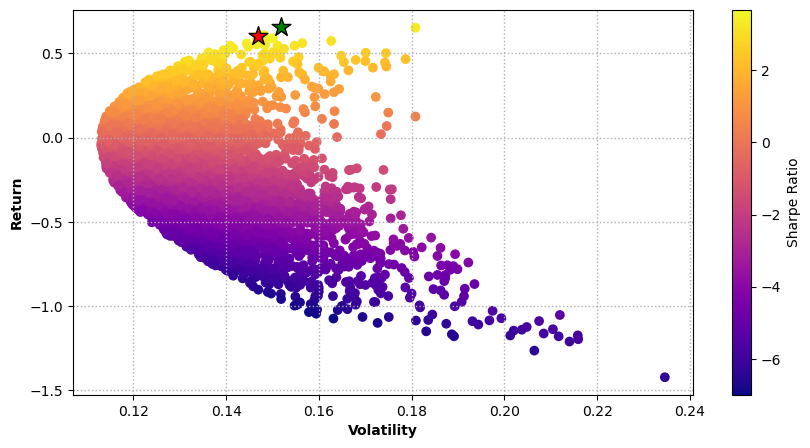

In [109]:
# Draw Efficient Frontier

plt.figure(figsize = (10,5))
plt.scatter(vol_arr, ret_arr, c = sharp_arr, cmap = 'plasma')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatility', fontweight = 'bold')
plt.ylabel('Return', fontweight = 'bold')

# Optimial point for Monte Carlos Simulation is labelled as red star
plt.scatter(optimal_volatility, optimal_return, c='red', s=200, edgecolors='black', marker='*')
plt.grid(True, ls=':', lw=1)

# Optimial point for Scipy Optimization is labelled as green star
plt.scatter(ret_vol_sr(opt_results.x)[1], ret_vol_sr(opt_results.x)[0], c='green', s=200, edgecolors='black', marker='*')

Summary:

The Monte Carlo Simulation provides a diversified portfolio with a balanced approach to risk and return, while the Scipy Optimization approach is more aggressive, concentrating investments in fewer stocks with higher expected returns but also slightly increased volatility.

Overall, the Scipy optimization yields better risk-adjusted returns (higher Sharpe ratio) and expected returns, making it a more favorable strategy in this context. However, the Monte Carlo simulation’s results reflect a more cautious approach to diversification that may suit risk-averse investors.

# Section 7 - Summaries and Recommendations

Workshop Summary

This workshop explored key concepts in portfolio optimization, focusing on sector analysis, stock selection methodologies, and mean-variance optimization (MVO). The main topics included:

- Understanding Sectors and Stock Indices: Selecting stock indices based on business objectives and industry trends using SectorsAPI. Data Collection and Exploration: Retrieving stock data from APIs and performing exploratory data analysis (EDA) to identify trends and outliers.
- Stock Selection via Diversification Strategy: Applying EDA and normalization techniques to score companies on growth potential, dividends, and financial indicators.
- Mean-Variance Optimization (MVO): Implementing portfolio optimization through Monte Carlo simulations and the Scipy minimized function to maximize returns for a given risk level.


Stock Index Selection

In this workshop, we focused on Indra’s case using a single stock index. In practice, building a robust portfolio involves selecting stocks from multiple indices, enhancing diversification across companies, regions, asset classes, and sectors to reduce risk and improve stability. Considerations include global market trends, macroeconomic conditions, and sector performance.


Stock Analysis and Selection

We employed a diversification strategy by normalizing the dataset and scoring companies based on key metrics. In real applications, the analysis would be more complex, incorporating:

- Macroeconomic Conditions: Factors like interest rates and inflation can significantly impact stock performance.
- Valuation Metrics: Evaluating P/E ratios, price-to-book, and free cash flow yield is critical for assessing valuations.
- Risk Factors: Systemic and geopolitical risks should be considered.
- Sustainability and ESG Factors: Institutional investors increasingly prioritize environmental, social, and governance criteria for long-term growth.


Mean-Variance Optimization

Two approaches to MVO were applied:

- Monte Carlo Simulation: This method generates thousands of random portfolios to visualize the efficient frontier and calculate the Sharpe ratio. While flexible, it can be computationally expensive and may not converge on the most efficient portfolios.
- Scipy Minimized Function: This deterministic method computes the optimal portfolio by minimizing volatility or maximizing the Sharpe ratio under specific constraints. It is faster but may be limited by initial guesses for weights and a narrower exploration of possibilities.
Limitations of Both Approaches:

Monte Carlo Limitations: Results depend on iterations, and high computational costs can limit efficiency. Historical returns may not capture future volatility or correlation shifts.

Scipy Optimization Limitations: Sensitivity to initial conditions may lead to local minima, and the assumption of normal return distribution may not hold during extreme market events.


To enhance analysis, consider:

- Dynamic Risk Modeling: Adjusting risk models for changing correlations and volatilities.
- Transaction Costs and Liquidity Constraints: Factoring in trading costs and asset liquidity in optimization models.
- Non-Normal Return Distributions: Accounting for tail risk and skewness in return distributions.

# Section 8 - Additional Concept Demo

## Calculate Single Stock Return

In [110]:
import numpy as np
import pandas as pd

# Create a small dataset of stock prices for 3 stocks over 5 days
data = {
    "Stock A": [100, 102, 101, 103, 105],
    "Stock B": [50, 51, 52, 51, 53],
    "Stock C": [200, 198, 202, 205, 210],
}
prices = pd.DataFrame(data, index=["Day 1", "Day 2", "Day 3", "Day 4", "Day 5"])

print(prices)

       Stock A  Stock B  Stock C
Day 1      100       50      200
Day 2      102       51      198
Day 3      101       52      202
Day 4      103       51      205
Day 5      105       53      210


In [111]:
# Calculate daily returns for each stock
daily_returns = prices.pct_change().iloc[1:]  # Drop the first row (NaN returns) / or use .dropna()
daily_returns

,Stock A,Stock B,Stock C
Day 2,0.020000,0.020000,-0.010000
Day 3,-0.009804,0.019608,0.020202
Day 4,0.019802,-0.019231,0.014851
Day 5,0.019417,0.039216,0.024390


In [112]:
# Calculate the average daily return (expected return) for each stock
average_daily_returns = daily_returns.mean()
average_daily_returns

Stock A    0.012354
Stock B    0.014898
Stock C    0.012361
dtype: float64

In [113]:
# Annualize the returns (assuming 252 trading days in a year)
annualized_returns = ( 1 + average_daily_returns) ** 252  - 1 # ** is ^ in python
annualized_returns

Stock A    21.067494
Stock B    40.539805
Stock C    21.106275
dtype: float64

In [114]:
results = pd.DataFrame({
    "Average Daily Return (%)": average_daily_returns * 100,
    "Annualized Return (%)": annualized_returns
})

print(results)

         Average Daily Return (%)  Annualized Return (%)
Stock A                  1.235388              21.067494
Stock B                  1.489819              40.539805
Stock C                  1.236094              21.106275


## Calculate Portfolio Return

In [115]:
# Define weights of the portfolio (summing up to 1)
weights = [0.4, 0.35, 0.25]  # Example weights for 3 assets

# Define average daily returns (in decimal form) for each asset
average_daily_returns = [0.005, 0.003, 0.002]  # Asset A, Asset B, Asset C

In [116]:
# Calculate portfolio average daily return using dot product
portfolio_daily_return = np.dot(weights, average_daily_returns)
portfolio_daily_return

0.00355

## Portfolio Variance & Covariance

In [117]:
# Example price data for 5 stocks over 5 days
data = {
    'Stock_A': [100, 102, 101, 104, 103],
    'Stock_B': [50, 51, 49, 52, 50],
    'Stock_C': [200, 202, 198, 205, 204],
    'Stock_D': [75, 76, 74, 78, 77],
    'Stock_E': [300, 298, 301, 305, 302]
}

# Example of weights of 5 stocks
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [118]:
price_df = pd.DataFrame(data)

In [119]:
# Calculate daily returns
daily_returns = price_df.pct_change().dropna()
daily_returns

,Stock_A,Stock_B,Stock_C,Stock_D,Stock_E
1,0.020000,0.020000,0.010000,0.013333,-0.006667
2,-0.009804,-0.039216,-0.019802,-0.026316,0.010067
3,0.029703,0.061224,0.035354,0.054054,0.013289
4,-0.009615,-0.038462,-0.004878,-0.012821,-0.009836


In [120]:
# Calculate the covariance matrix of daily returns
cov_matrix = daily_returns.cov()
cov_matrix

,Stock_A,Stock_B,Stock_C,Stock_D,Stock_E
Stock_A,0.000414,0.000982,0.000445,0.000680,0.000068
Stock_B,0.000982,0.002387,0.001103,0.001692,0.000219
Stock_C,0.000445,0.001103,0.000553,0.000827,0.000072
Stock_D,0.000680,0.001692,0.000827,0.001252,0.000147
Stock_E,0.000068,0.000219,0.000072,0.000147,0.000136


In [121]:
# Calculate portfolio variance using the formula
# Portfolio Variance = weights.T * cov_matrix * weights
portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

In [122]:
# Display results
print("\nDaily Returns:\n", daily_returns)
print("\nCovariance Matrix:\n", cov_matrix)
print("\nPortfolio Variance:", portfolio_variance)


Daily Returns:
     Stock_A   Stock_B   Stock_C   Stock_D   Stock_E
1  0.020000  0.020000  0.010000  0.013333 -0.006667
2 -0.009804 -0.039216 -0.019802 -0.026316  0.010067
3  0.029703  0.061224  0.035354  0.054054  0.013289
4 -0.009615 -0.038462 -0.004878 -0.012821 -0.009836

Covariance Matrix:
           Stock_A   Stock_B   Stock_C   Stock_D   Stock_E
Stock_A  0.000414  0.000982  0.000445  0.000680  0.000068
Stock_B  0.000982  0.002387  0.001103  0.001692  0.000219
Stock_C  0.000445  0.001103  0.000553  0.000827  0.000072
Stock_D  0.000680  0.001692  0.000827  0.001252  0.000147
Stock_E  0.000068  0.000219  0.000072  0.000147  0.000136

Portfolio Variance: 0.000688640180920537


Key Insights:

1. Positive Covariance: Indicates that when one stock’s return increases, the other stock’s return also tends to increase.
*Example: Covariance between Stock_A and Stock_B is 0.000982. This shows a relatively strong positive relationship between their returns.*

2. Negative Covariance: (None in this matrix) Would indicate that the returns of two stocks tend to move in opposite directions.
*If there were negative values, it would suggest diversification benefits in the portfolio (stocks behaving oppositely can reduce risk).*

3. Magnitude: Larger values (e.g., 0.001692 between Stock_B and Stock_D) indicate a stronger relationship, while smaller values (e.g., 0.000068 between Stock_A and Stock_E) show a weaker relationship.